In [7]:
%pylab inline
import numpy as np
import pandas as pd
import os
import Hamiltonian
import MoireLattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [8]:
 #Lattice parameters 
#lattices with different normalizations 
Nsamp=10
theta=1.05*np.pi/180  # magic angle 
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
[KX,KY]=lq.Generate_lattice()
Npoi=np.size(KX); print(Npoi, "numer of sampling lattice points")
[q1,q2,q3]=l.q
q=la.norm(q1)
umkl=3
print(f"taking {umkl} umklapps")
VV=lq.boundary()


#phonon parameters
a_graphene=2.458*(1e-10) #in meters this is the lattice constant NOT the carbon-carbon distance
e_el=1.6021766*(10**(-19))  #in joule/ev
c_light=299792458 #m/s
M=1.99264687992e-26 * (c_light*c_light/e_el) # [in units of eV]
mass=M/(c_light**2) # in ev *s^2/m^2
hhbar=6.582119569e-16 #(in eV s)
alpha_ep=2 # in ev
beta_ep=4 #in ev SHOULD ALWAYS BE GREATER THAN ZERO



#calculating effective coupling
A1mbz=lq.VolMBZ*((q**2)/(a_graphene**2))
AWZ_graphene=np.sqrt(3)*a_graphene*a_graphene/2
A1bz=(2*np.pi)**2 / AWZ_graphene
alpha_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*alpha_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
beta_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*beta_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
alpha_ep_effective_tilde=alpha_ep_effective/beta_ep_effective
beta_ep_effective_tilde=beta_ep_effective/beta_ep_effective

gp2=1

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.007894039154052734  s
91 numer of sampling lattice points
taking 3 umklapps


In [10]:

pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathMAC
path=pathy+'/Mods/singlebubs/'
listdf=[]
the=0.01832595714594046
for i in [0.9,0.75,0.6,0.45,0.375,0.3,0.15]:
    pathf=path+'data35_mode_T_symmetry_a_alpha_0.0_beta_1.0_umklp_0_kappa_'+str(i)+'_theta_'+str(the)+'.h5'
    df = pd.read_hdf(pathf)
    listdf.append(df)
df = pd.concat(listdf).sort_values(['kappa', 'nu'])

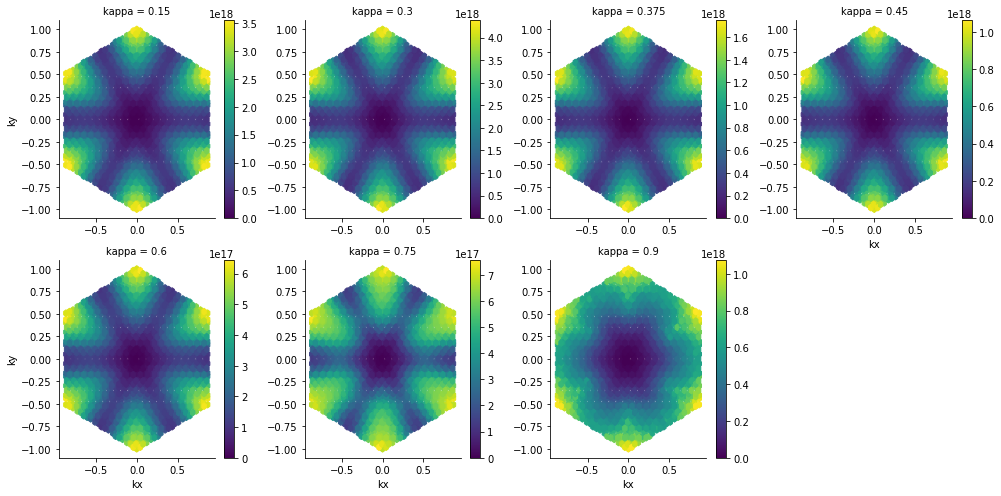

In [11]:

cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    # color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color

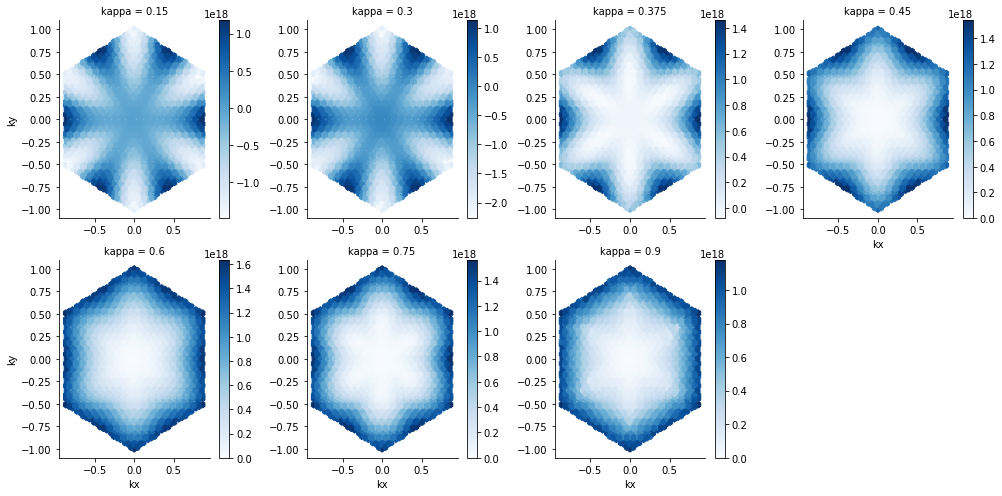

In [12]:

cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    d3 = cons*(cTrans**2) * (d2**2 +d1**2)-gp2*data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)), cmap=color_map)
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color



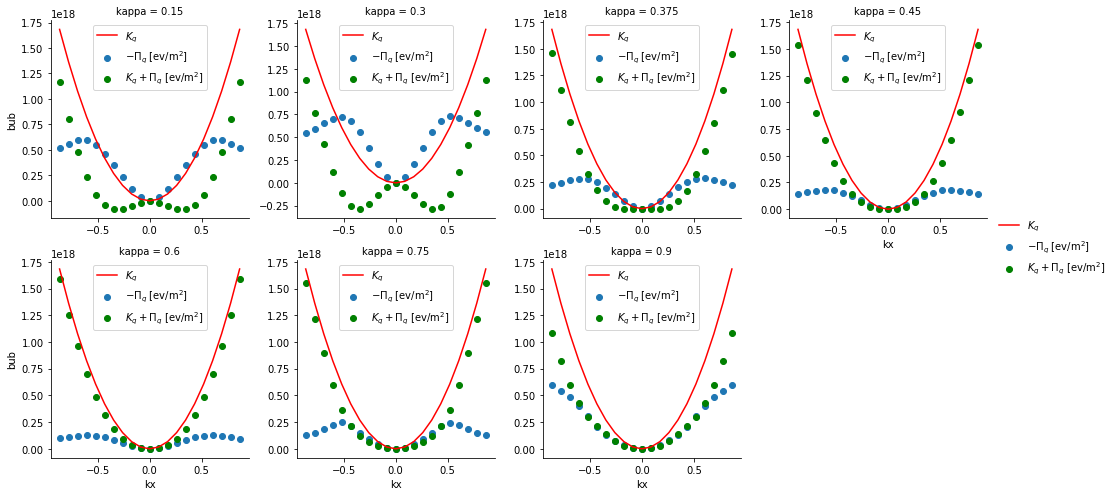

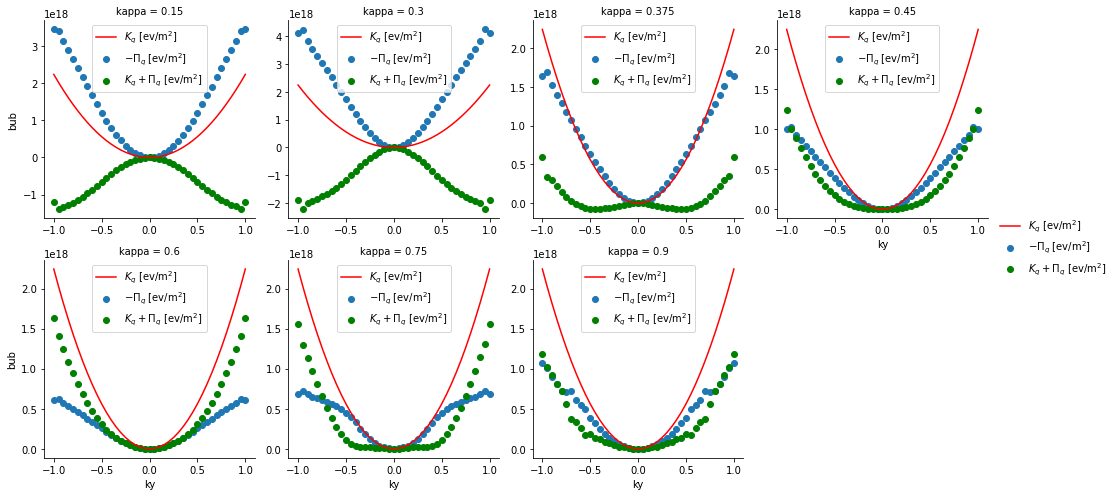

In [13]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background col

In [17]:
pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathMAC
path=pathy+'/Mods/singlebubs/'
listdf=[]
the=0.018500490071139894
for i in [0.9,0.75,0.6, 0.45,0.3]:
    pathf=path+'data35_mode_T_symmetry_a_alpha_0.0_beta_1.0_umklp_0_kappa_'+str(i)+'_theta_'+str(the)+'.h5'
    df = pd.read_hdf(pathf)
    listdf.append(df)
df = pd.concat(listdf).sort_values(['kappa', 'nu'])

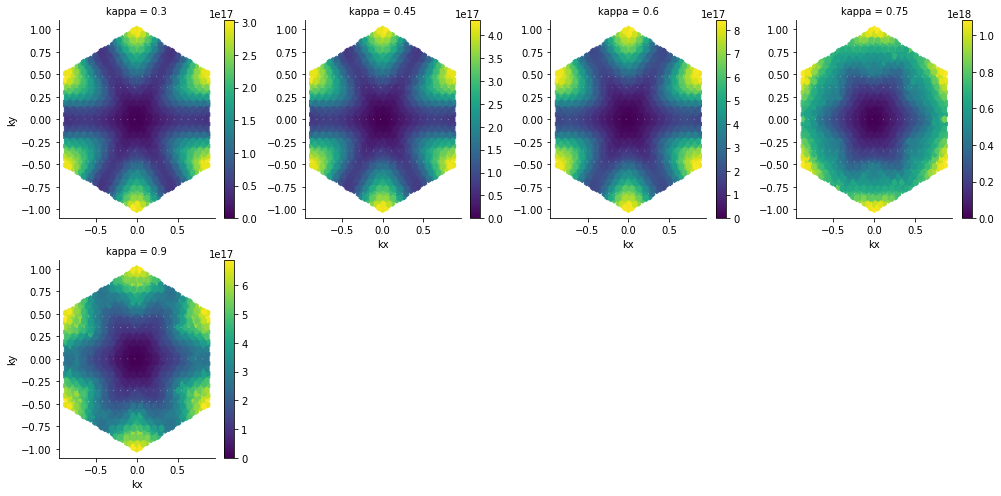

In [18]:

cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    # color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color

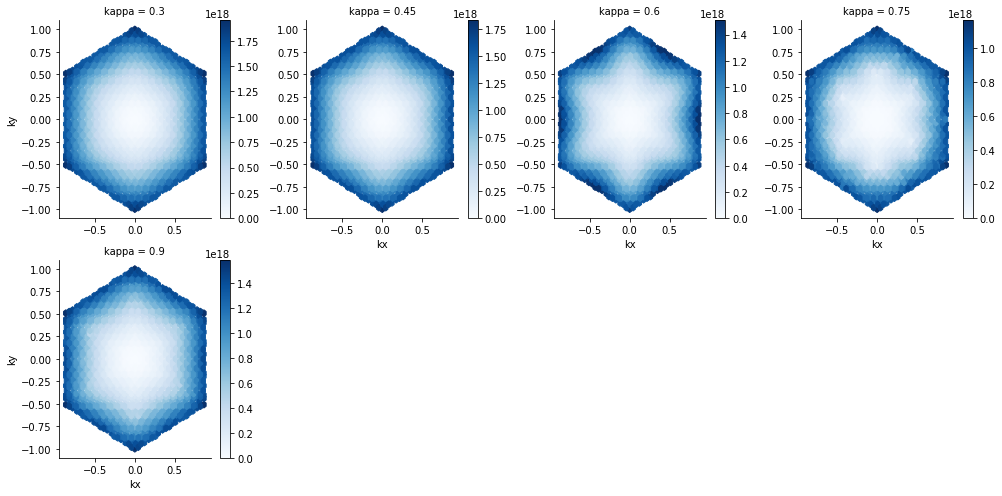

In [19]:

cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    d3 = cons*(cTrans**2) * (d2**2 +d1**2)-gp2*data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)), cmap=color_map)
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


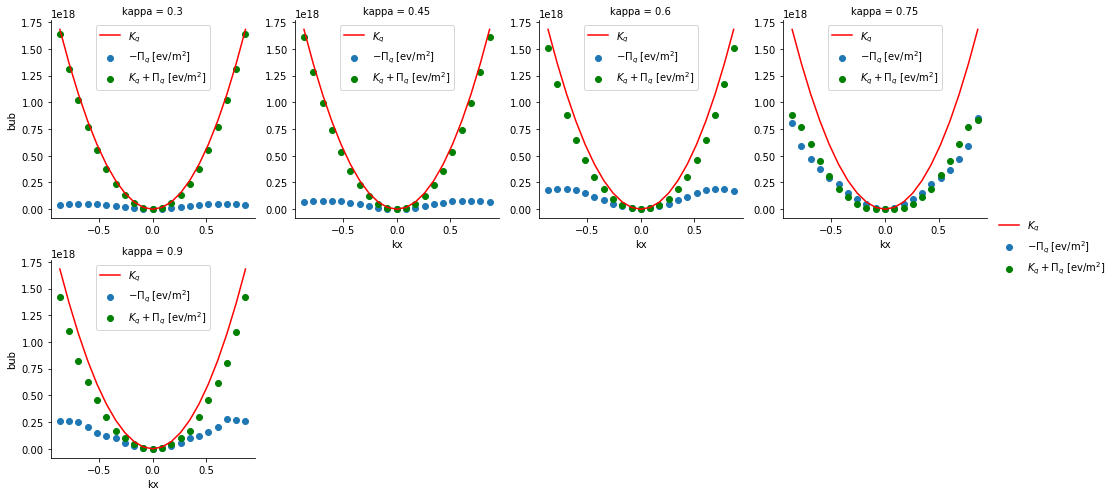

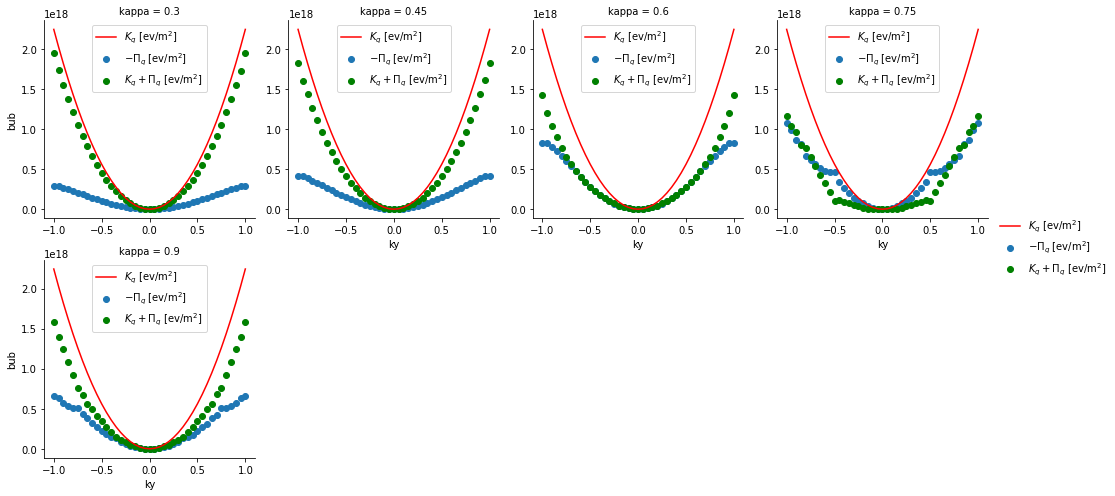

In [20]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color


df_one_temp=df.loc[(df['nu'] == 0.0) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background col

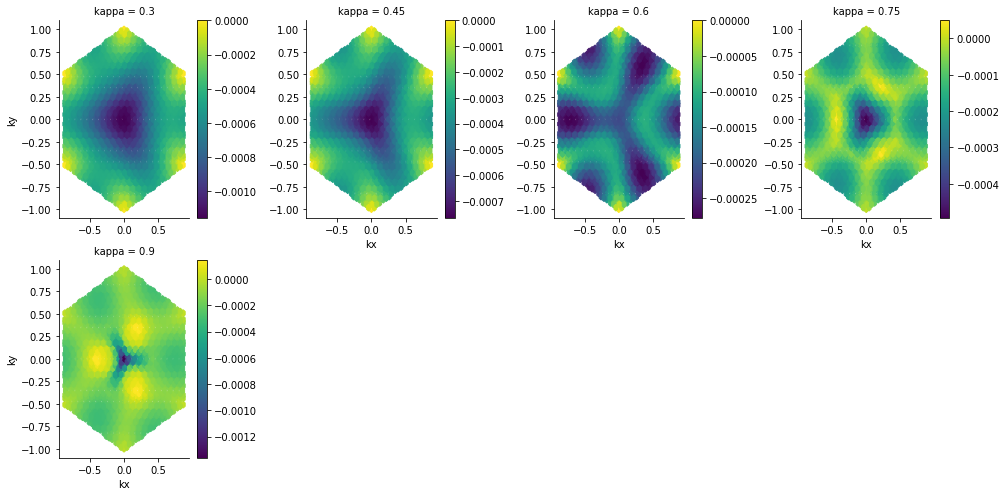

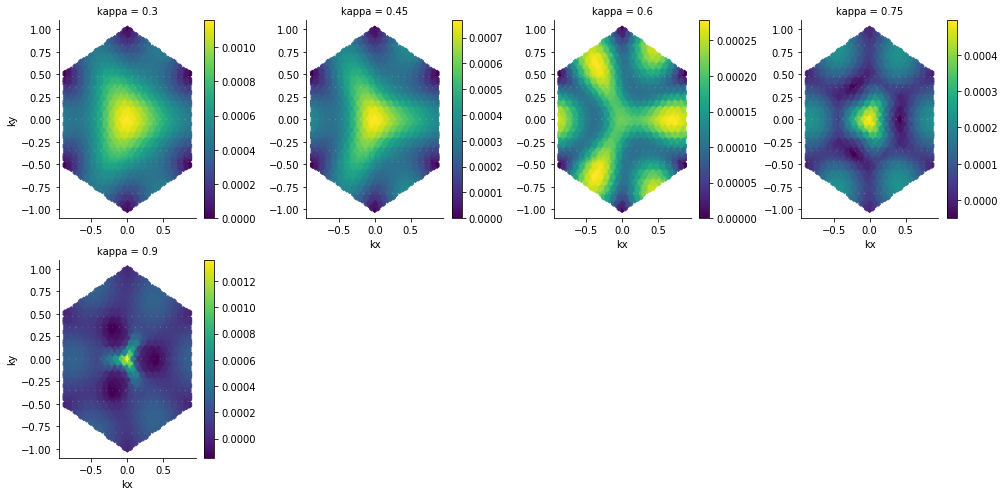

In [26]:

cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    # color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1', cbar=False, square = True)
# get figure background color


cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    # color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep2', cbar=False, square = True)
# get figure background color

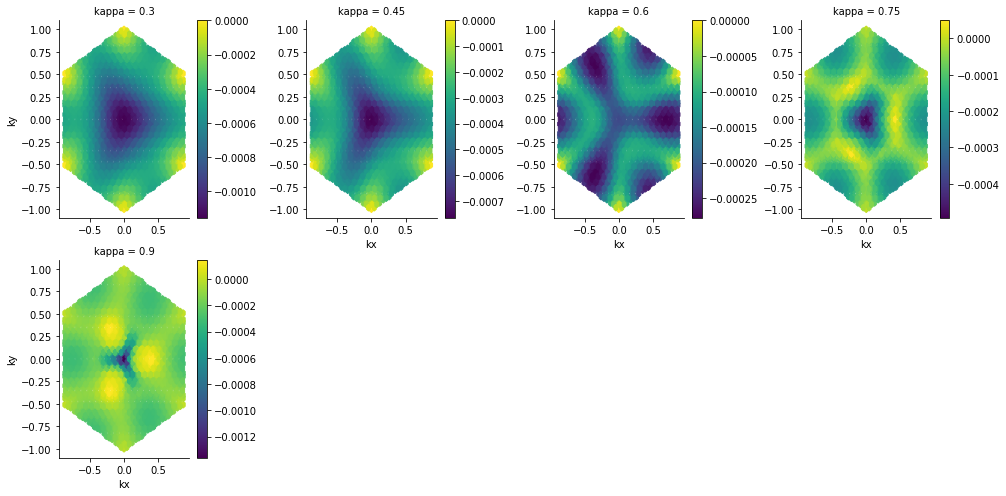

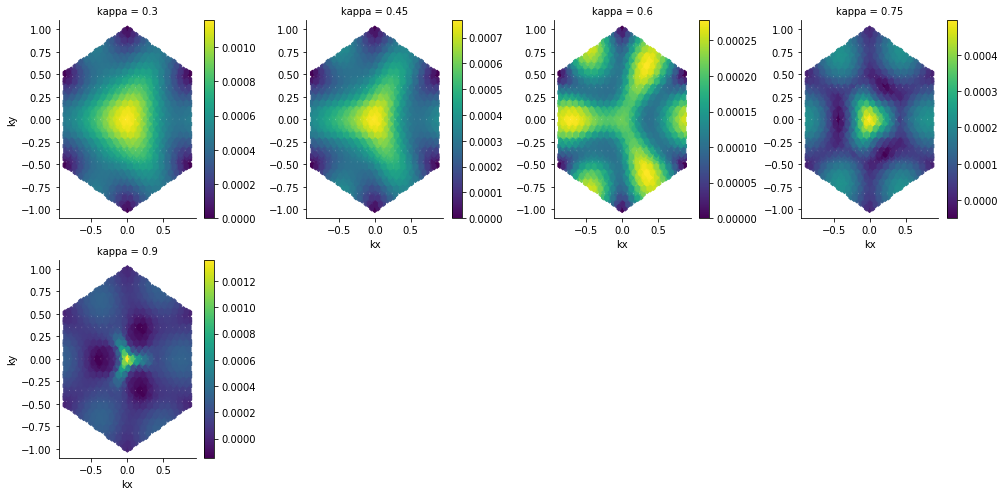

In [27]:

cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    # color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Em1', cbar=False, square = True)
# get figure background color


cTrans=13600
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    # color_map = plt.cm.get_cmap('Blues')

    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Em2', cbar=False, square = True)
# get figure background color